In [1]:
import math
import random
import matplotlib.pyplot as plt

In [2]:
# First function to optimize
def function1(x):
    return -x**2

# Second function to optimize
def function2(x):
    return -(x-2)**2

In [3]:
# Function to find the index of a value in a list
def index_of(a, list):
    try:
        return list.index(a)
    except ValueError:
        return -1

# Function to sort by values
def sort_by_values(list1, values):
    sorted_list = []
    values_copy = values[:]
    while len(sorted_list) != len(list1):
        min_index = index_of(min(values_copy), values_copy)
        if min_index in list1:
            sorted_list.append(min_index)
        values_copy[min_index] = math.inf
    return sorted_list


In [4]:
# Function to carry out NSGA-II's fast non dominated sort
def fast_non_dominated_sort(values1, values2):
    S = [[] for _ in range(len(values1))]
    front = [[]]
    n = [0 for _ in range(len(values1))]
    rank = [0 for _ in range(len(values1))]

    for p in range(len(values1)):
        S[p] = []
        n[p] = 0
        for q in range(len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or \
               (values1[p] >= values1[q] and values2[p] > values2[q]) or \
               (values1[p] > values1[q] and values2[p] >= values2[q]):
                S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or \
                 (values1[q] >= values1[p] and values2[q] > values2[p]) or \
                 (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] += 1
        if n[p] == 0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while front[i]:
        Q = []
        for p in front[i]:
            for q in S[p]:
                n[q] -= 1
                if n[q] == 0:
                    rank[q] = i + 1
                    if q not in Q:
                        Q.append(q)
        i += 1
        front.append(Q)
    del front[-1]
    return front


In [5]:
# Function to calculate crowding distance
def crowding_distance(values1, values2, front):
    distance = [0 for _ in range(len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = distance[-1] = float('inf')
    for k in range(1, len(front) - 1):
        distance[k] += (values1[sorted1[k + 1]] - values1[sorted1[k - 1]]) / (max(values1) - min(values1))
        distance[k] += (values2[sorted2[k + 1]] - values2[sorted2[k - 1]]) / (max(values2) - min(values2))
    return distance


In [6]:
# Function to carry out the crossover
def crossover(a, b):
    r = random.random()
    if r > 0.5:
        return mutation((a + b) / 2)
    else:
        return mutation((a - b) / 2)

# Function to carry out the mutation operator
def mutation(solution):
    mutation_prob = random.random()
    if mutation_prob < 0.1:
        solution = min_x + (max_x - min_x) * random.random()
    return solution


In [7]:
# Main program starts here
pop_size = 20
max_gen = 50

# Initialization
min_x = -55
max_x = 55
solution = [min_x + (max_x - min_x) * random.random() for _ in range(pop_size)]
gen_no = 0

# Tracking progress for visualization
progress = []


In [8]:
while gen_no < max_gen:
    function1_values = [function1(solution[i]) for i in range(pop_size)]
    function2_values = [function2(solution[i]) for i in range(pop_size)]
    non_dominated_sorted_solution = fast_non_dominated_sort(function1_values[:], function2_values[:])
    print(f"The best front for Generation number {gen_no} is")
    for value in non_dominated_sorted_solution[0]:
        print(round(solution[value], 3), end=" ")
    print("\n")
    
    # Store progress for visualization
    progress.append((function1_values, function2_values))
    
    crowding_distance_values = []
    for i in range(len(non_dominated_sorted_solution)):
        crowding_distance_values.append(crowding_distance(function1_values[:], function2_values[:], non_dominated_sorted_solution[i][:]))
    solution2 = solution[:]
    
    # Generating offsprings
    while len(solution2) != 2 * pop_size:
        a1 = random.randint(0, pop_size - 1)
        b1 = random.randint(0, pop_size - 1)
        solution2.append(crossover(solution[a1], solution[b1]))
    
    function1_values2 = [function1(solution2[i]) for i in range(2 * pop_size)]
    function2_values2 = [function2(solution2[i]) for i in range(2 * pop_size)]
    non_dominated_sorted_solution2 = fast_non_dominated_sort(function1_values2[:], function2_values2[:])
    crowding_distance_values2 = []
    for i in range(len(non_dominated_sorted_solution2)):
        crowding_distance_values2.append(crowding_distance(function1_values2[:], function2_values2[:], non_dominated_sorted_solution2[i][:]))
    
    new_solution = []
    for i in range(len(non_dominated_sorted_solution2)):
        non_dominated_sorted_solution2_1 = [index_of(non_dominated_sorted_solution2[i][j], non_dominated_sorted_solution2[i]) for j in range(len(non_dominated_sorted_solution2[i]))]
        front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
        front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(len(non_dominated_sorted_solution2[i]))]
        front.reverse()
        for value in front:
            new_solution.append(value)
            if len(new_solution) == pop_size:
                break
        if len(new_solution) == pop_size:
            break
    solution = [solution2[i] for i in new_solution]
    gen_no += 1


The best front for Generation number 0 is
1.911 

The best front for Generation number 1 is
1.911 1.911 

The best front for Generation number 2 is
1.911 1.911 0.0 2.054 1.911 0.233 

The best front for Generation number 3 is
1.911 1.911 1.911 2.054 0.233 1.911 0.229 0.0 0.0 1.284 

The best front for Generation number 4 is
1.911 1.911 0.0 0.229 0.116 0.0 0.233 0.642 1.911 1.284 0.0 1.911 2.054 0.956 0.839 0.717 0.0 1.744 1.911 

The best front for Generation number 5 is
1.911 1.911 0.642 1.911 0.233 0.0 0.956 0.0 1.911 1.284 1.982 0.717 1.314 0.642 0.114 1.744 0.839 0.116 0.229 0.0 

The best front for Generation number 6 is
1.911 1.911 1.284 1.982 1.911 0.114 0.642 0.0 0.956 0.0 0.717 0.839 0.551 0.116 1.049 0.642 1.744 1.911 0.642 0.0 

The best front for Generation number 7 is
1.911 1.911 0.956 0.0 0.0 0.642 0.116 0.0 0.717 1.049 0.551 0.839 1.911 0.642 0.204 1.911 0.358 1.863 0.114 0.0 

The best front for Generation number 8 is
1.911 1.911 0.116 0.0 0.642 0.778 0.204 1.911 0.717 

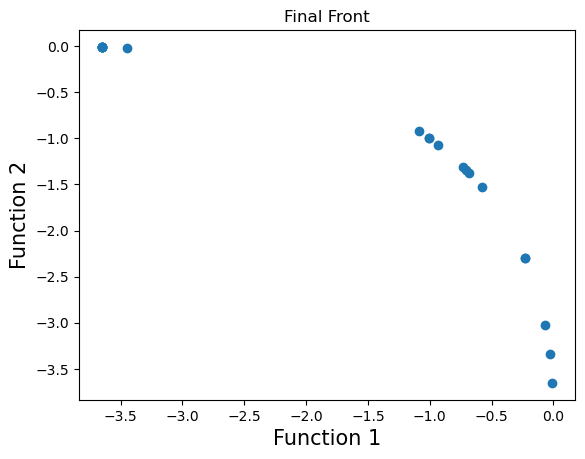

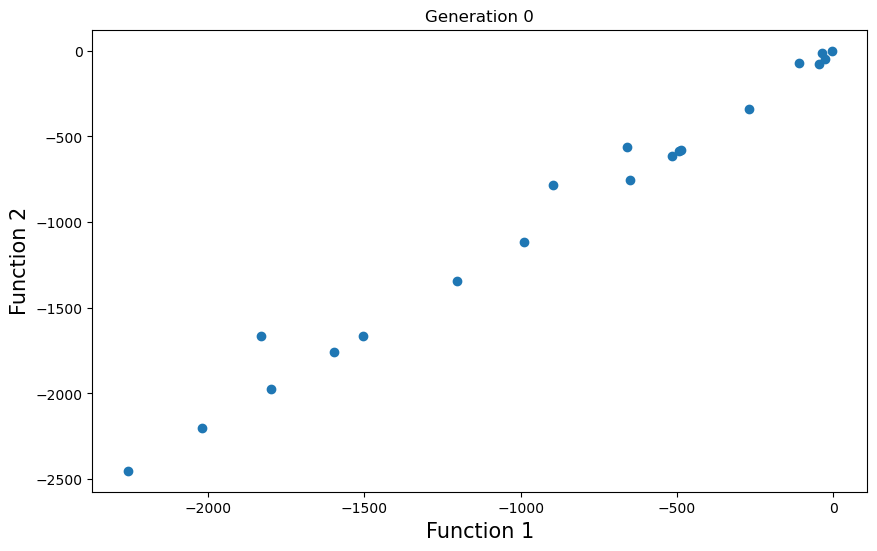

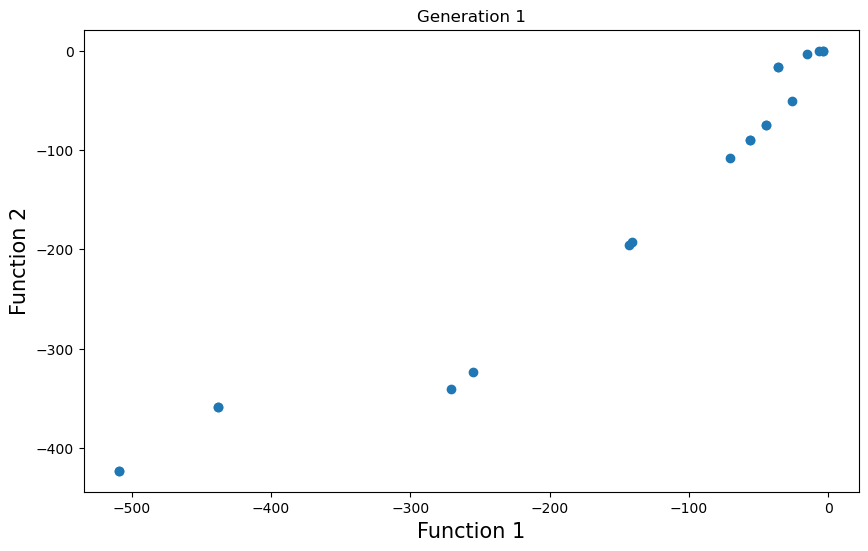

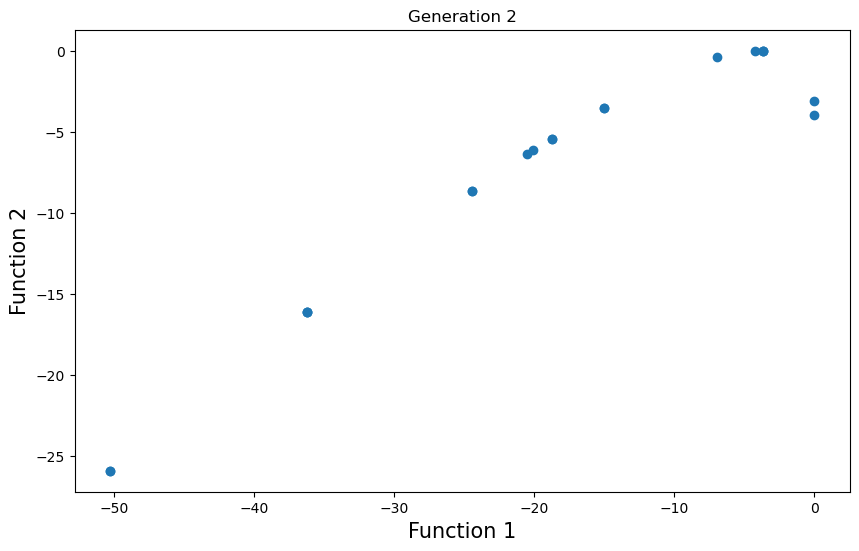

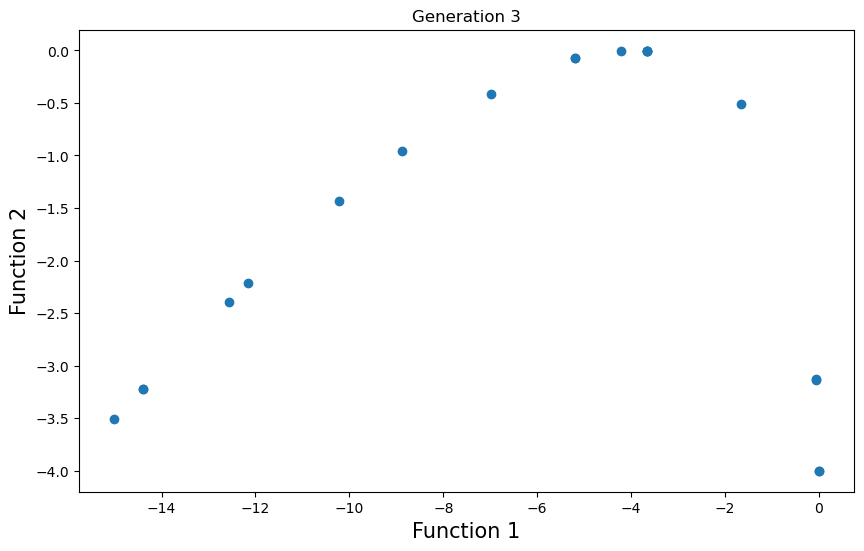

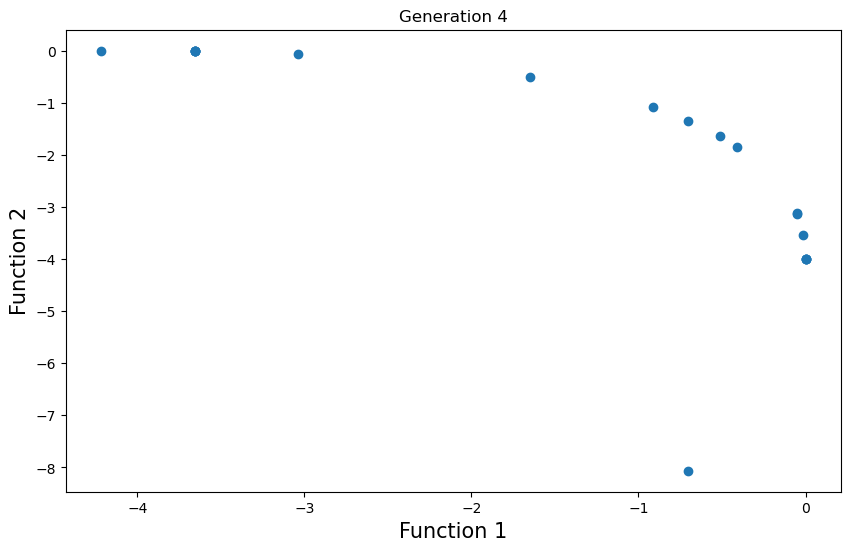

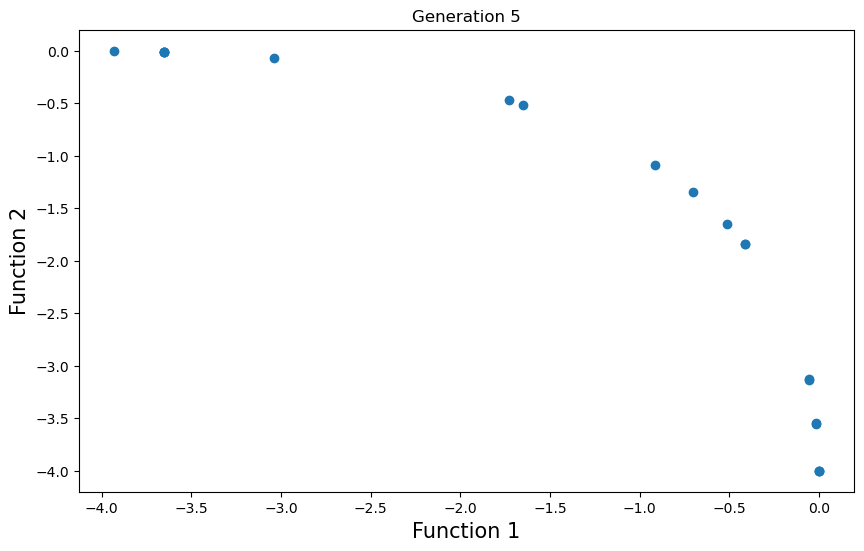

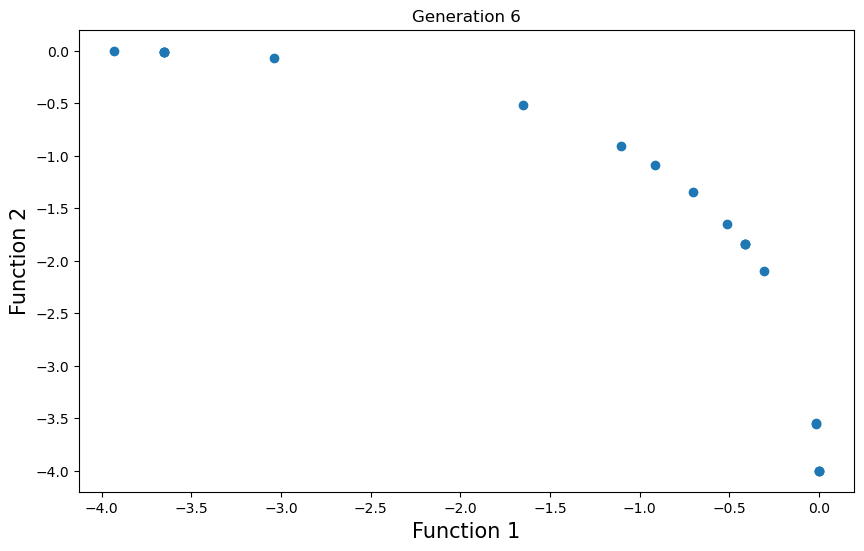

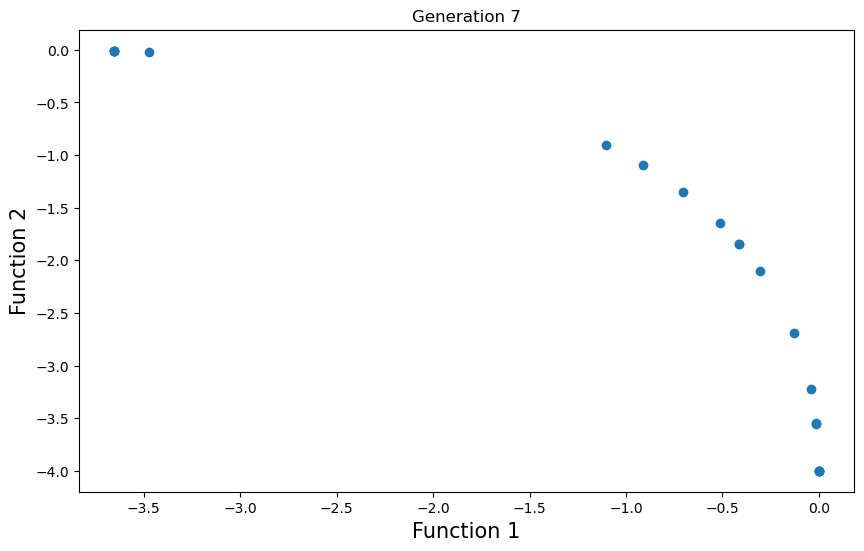

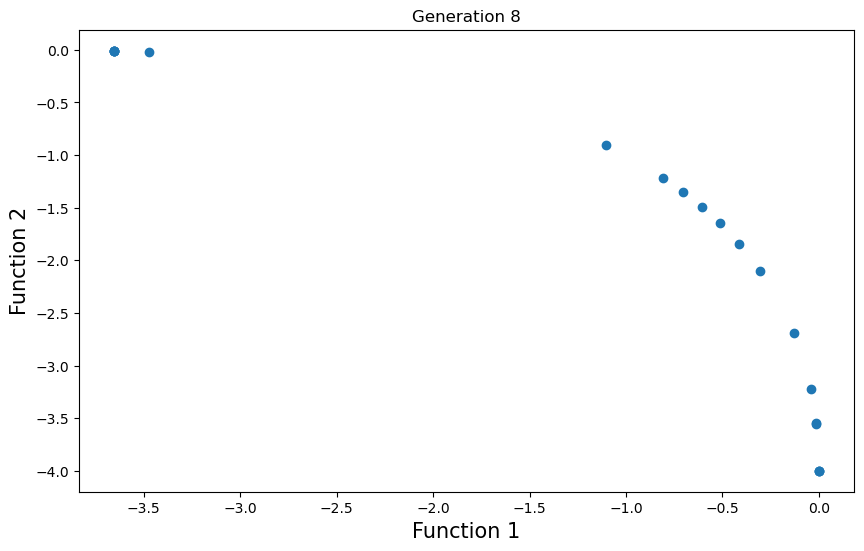

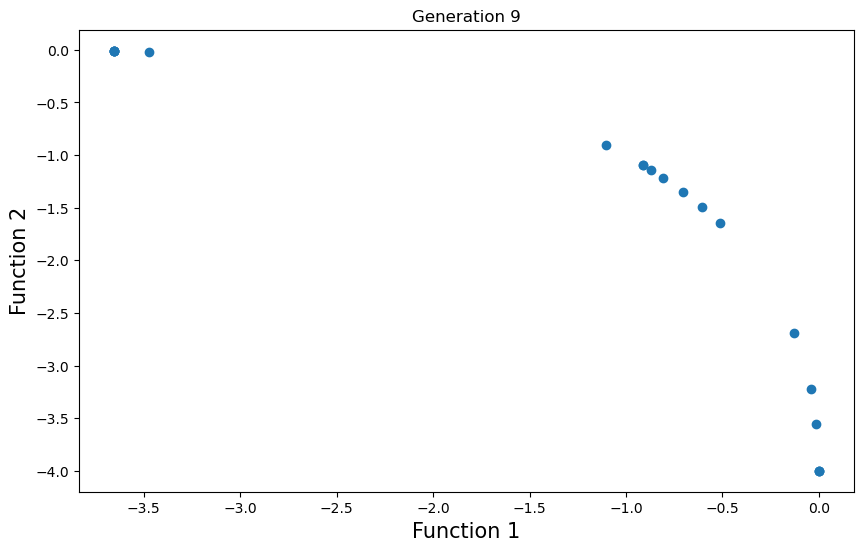

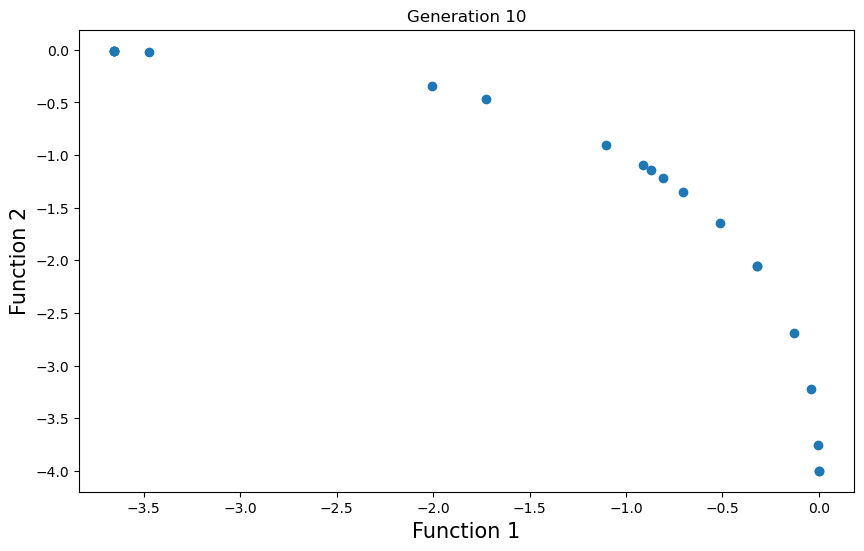

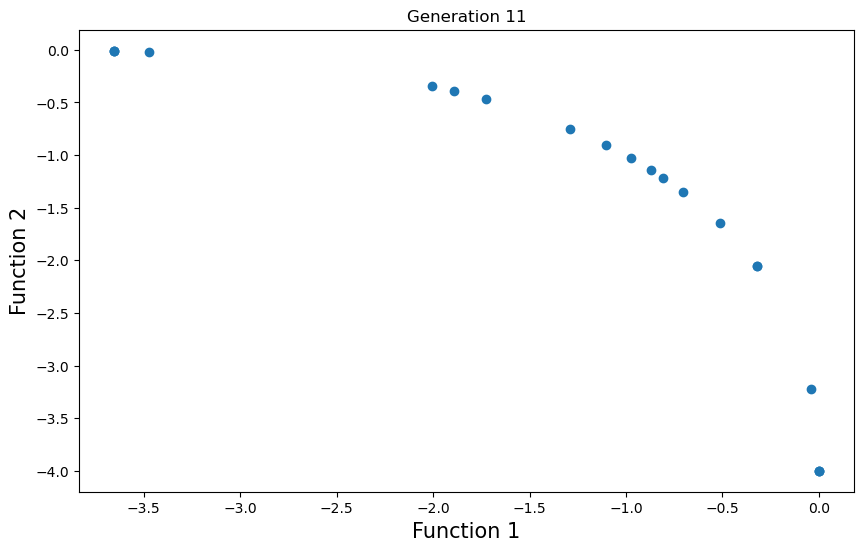

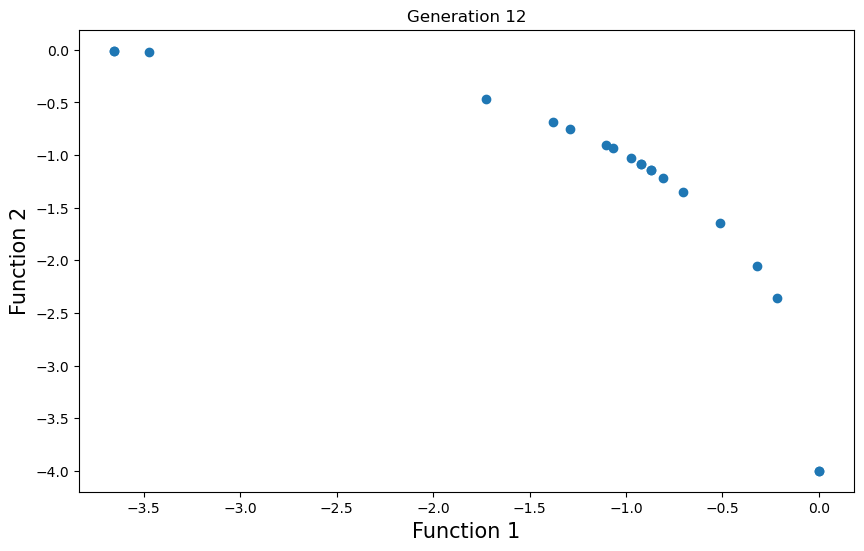

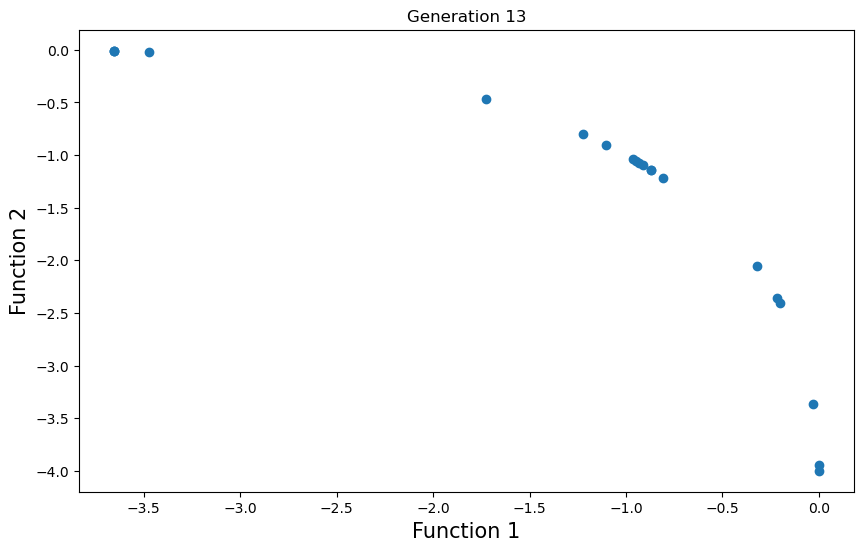

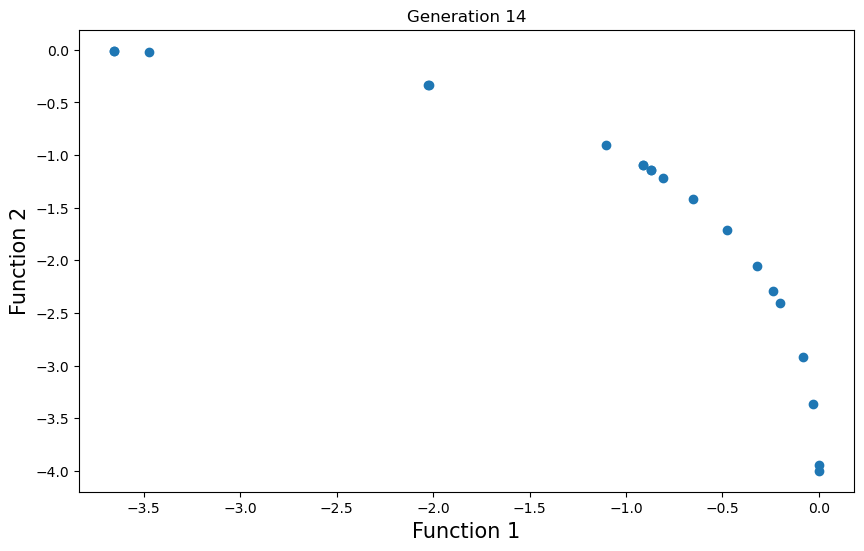

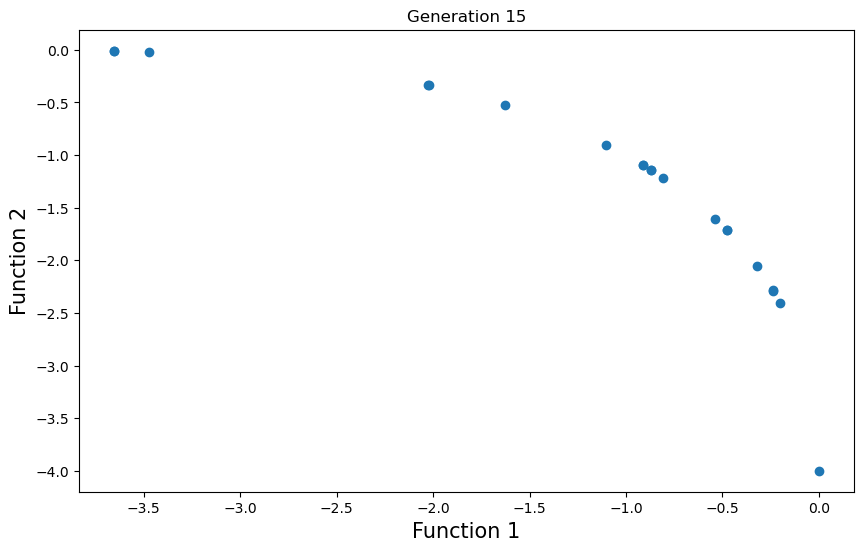

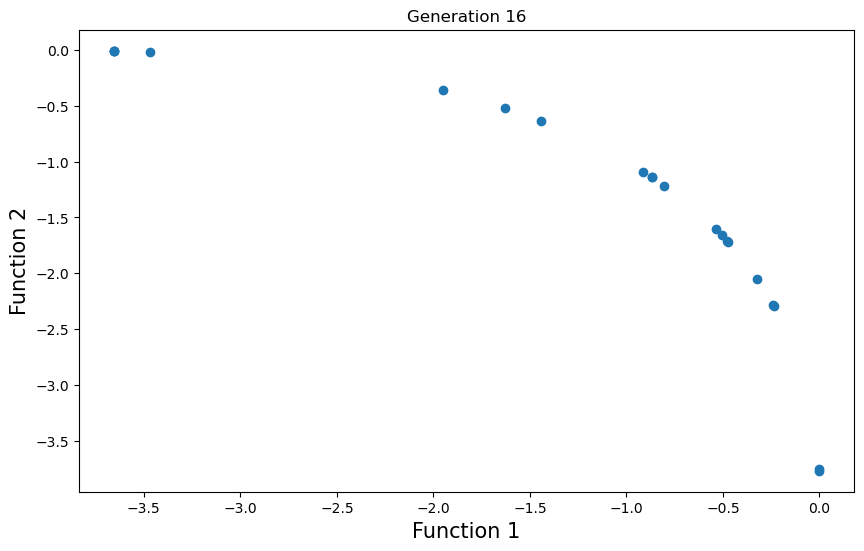

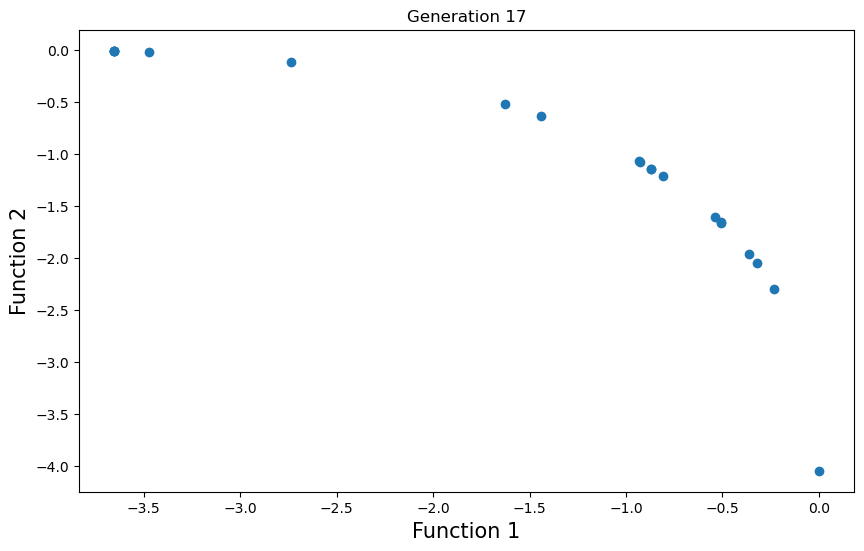

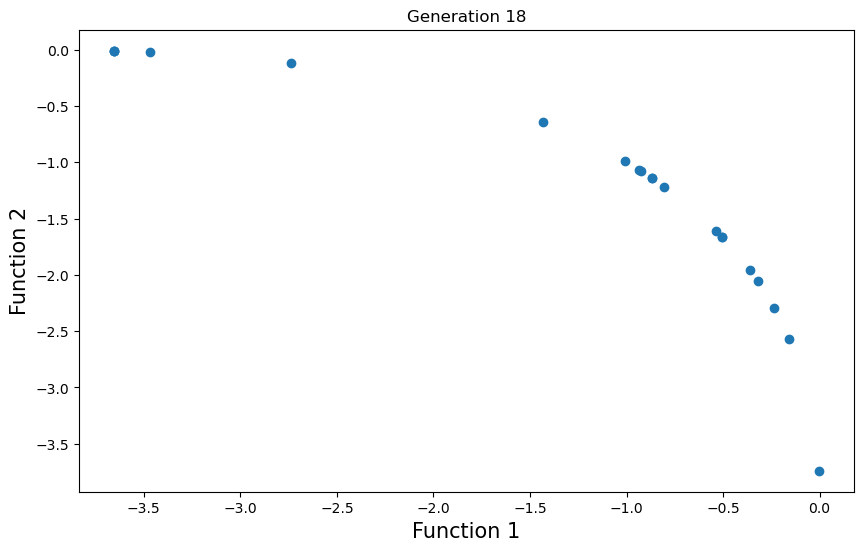

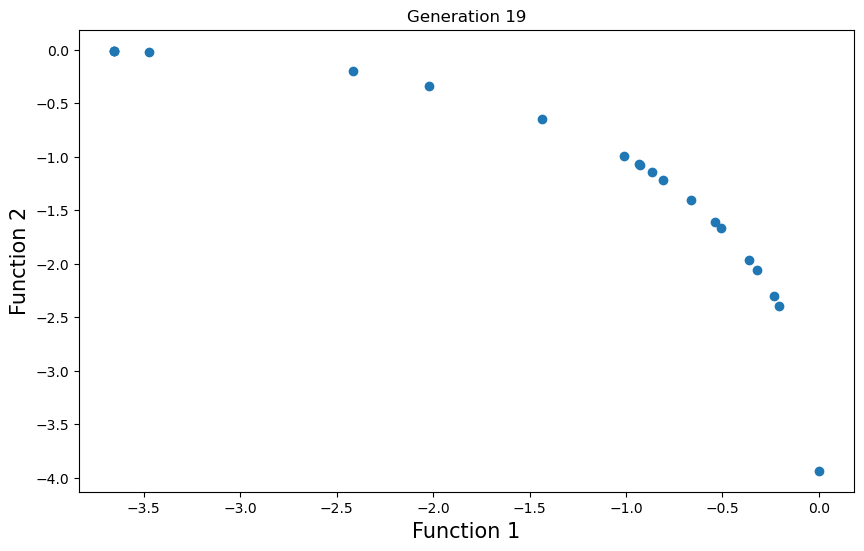

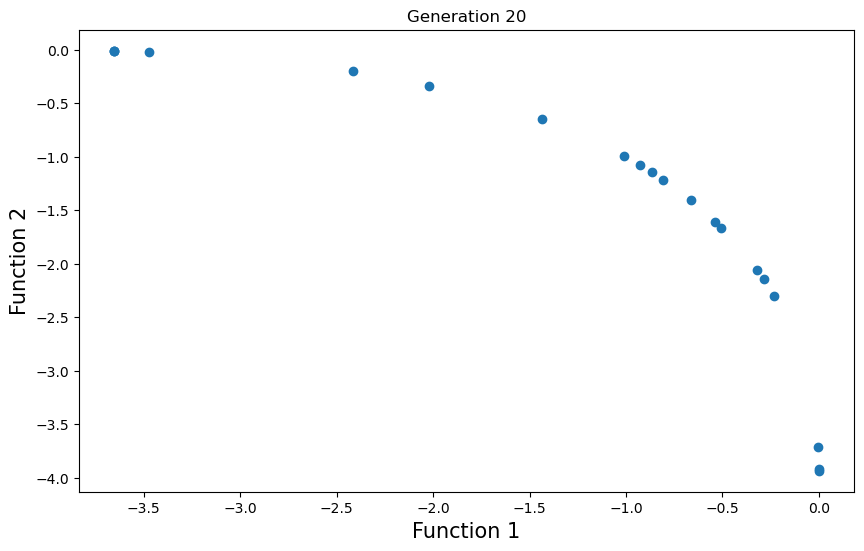

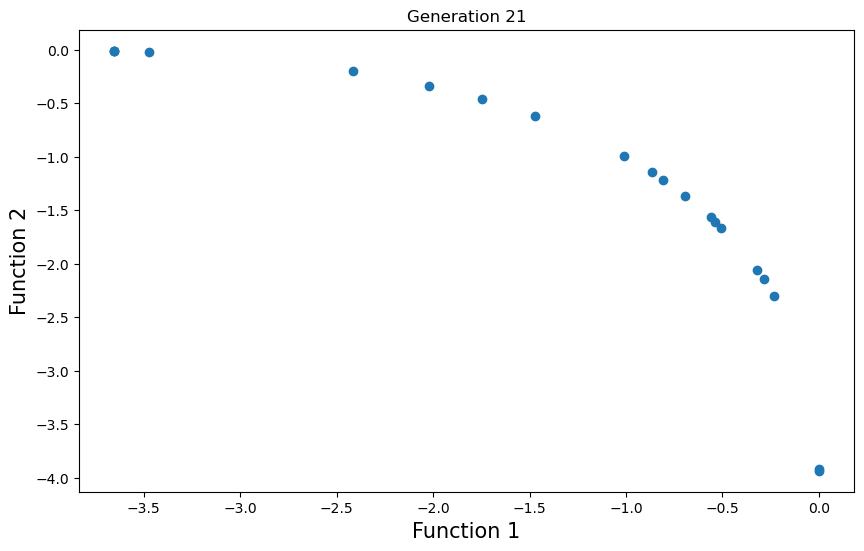

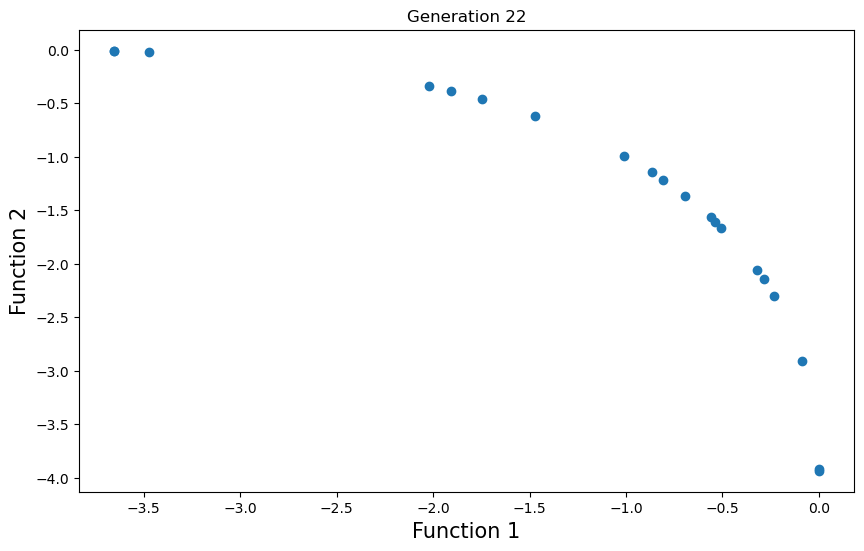

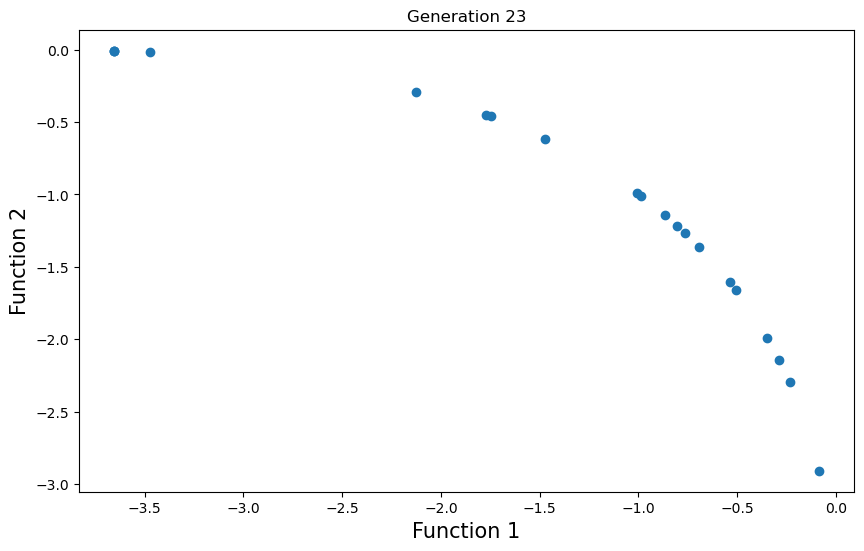

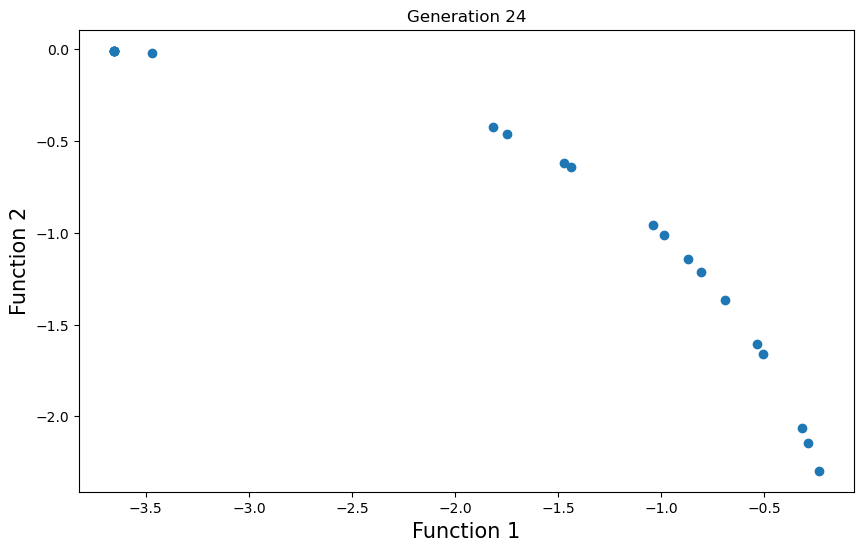

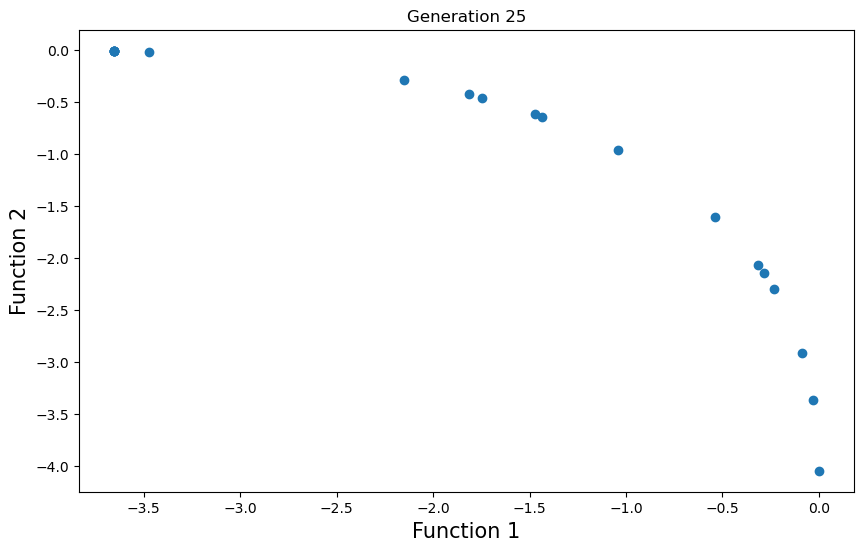

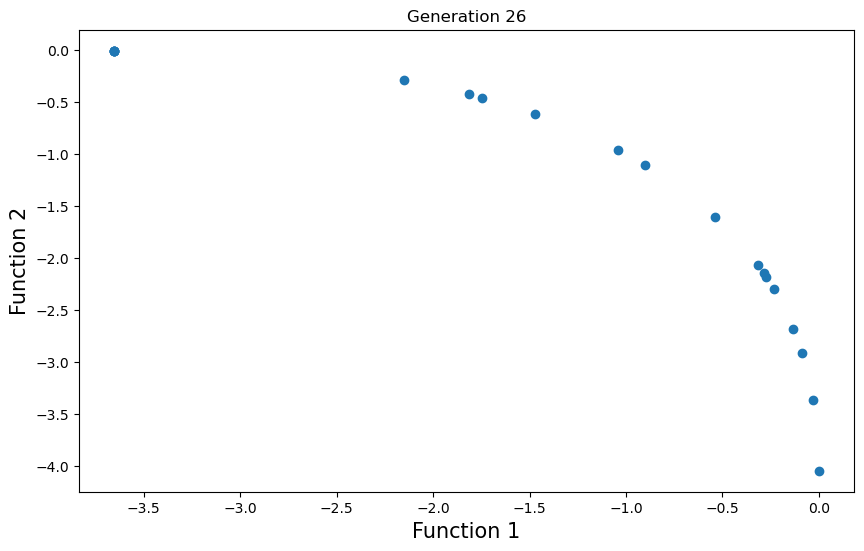

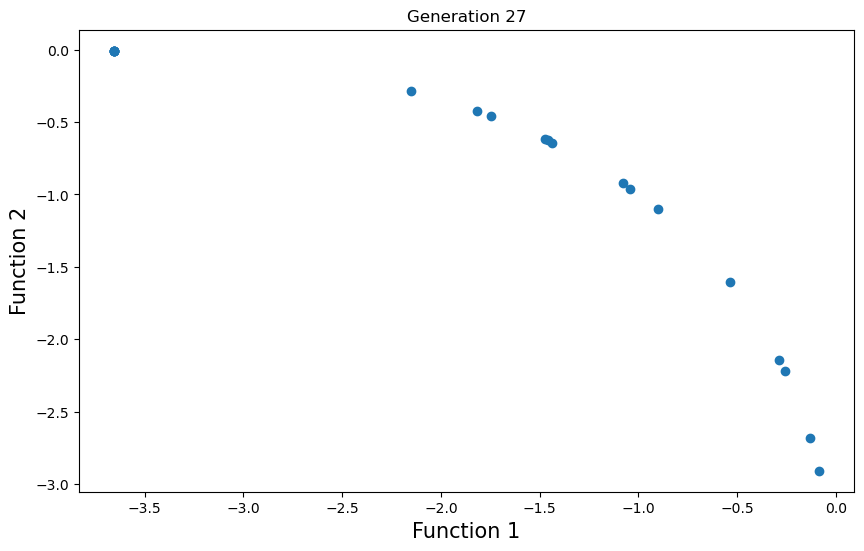

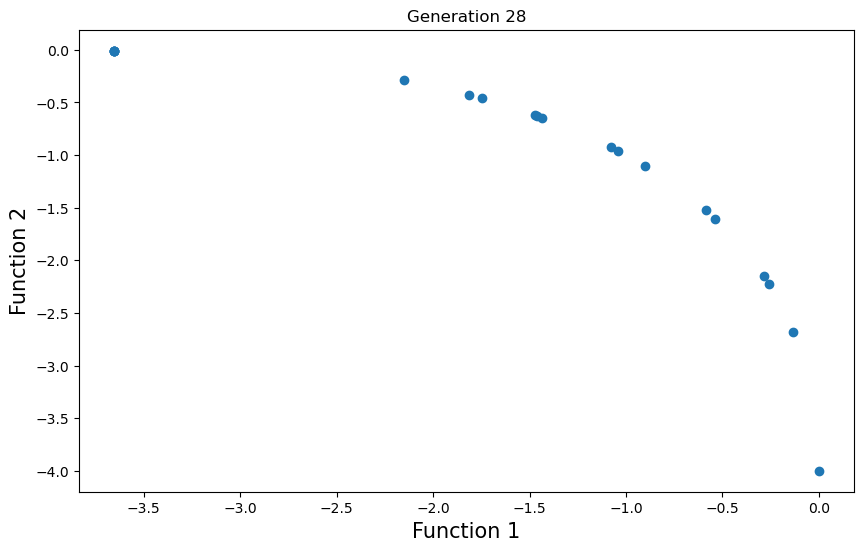

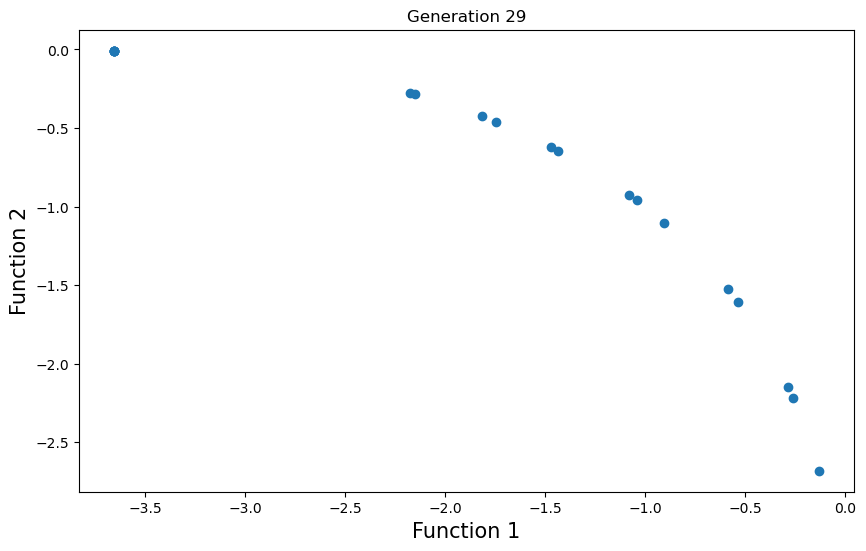

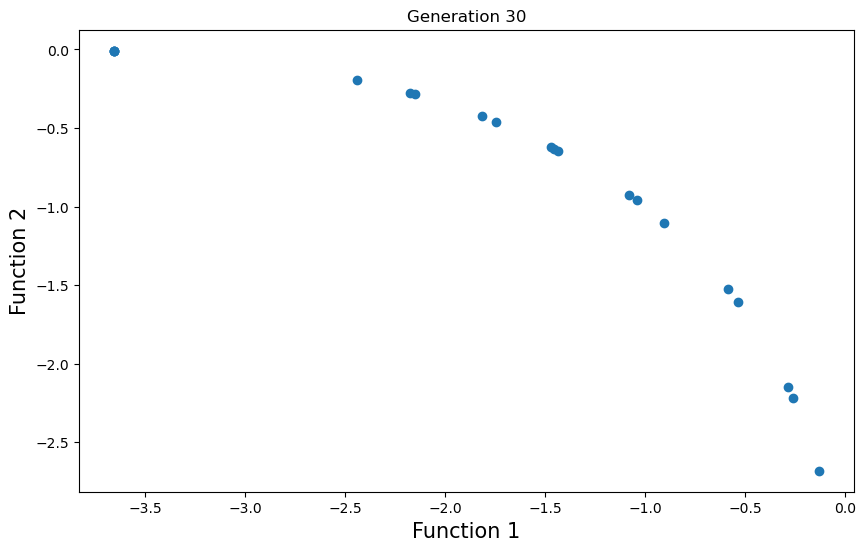

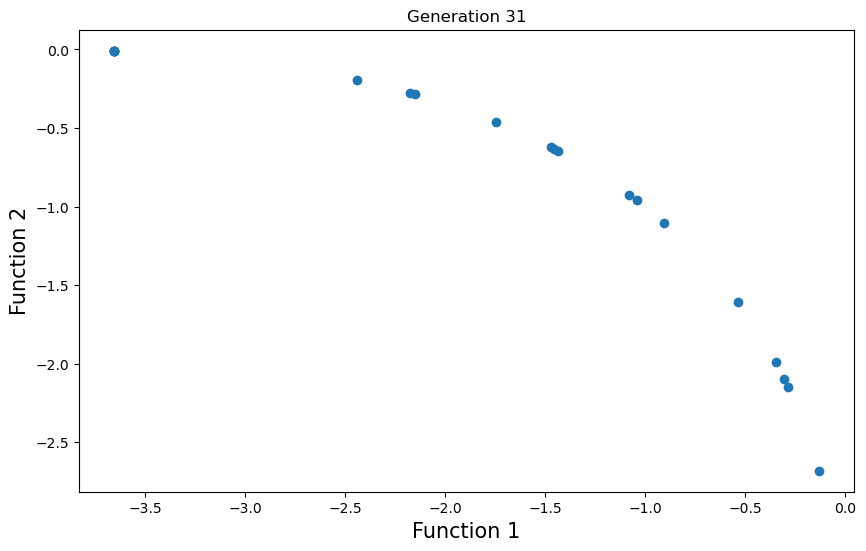

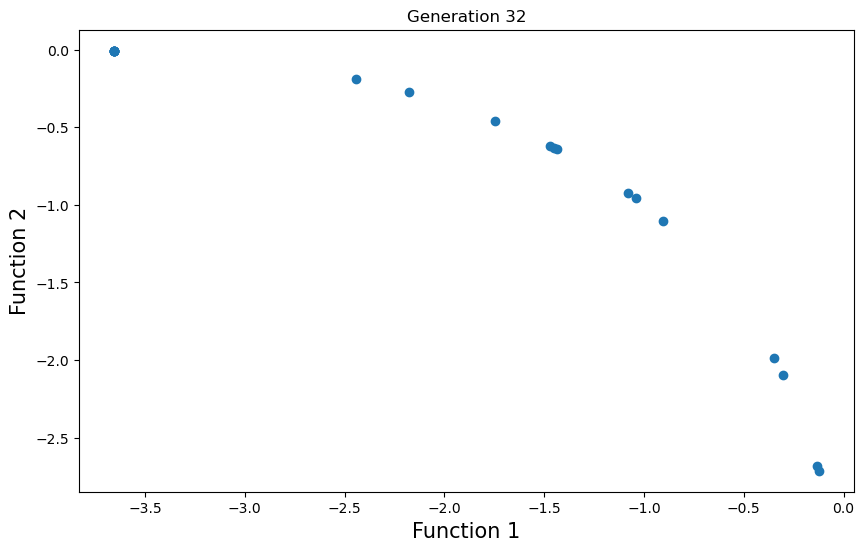

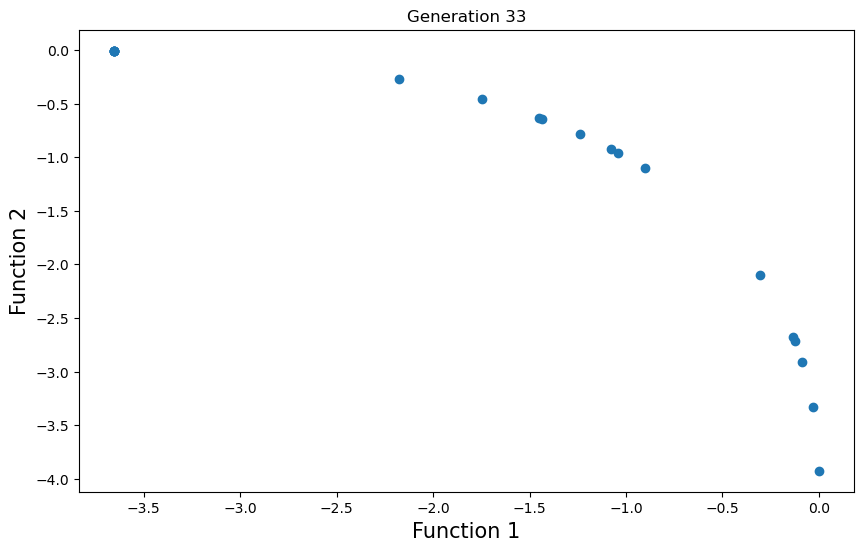

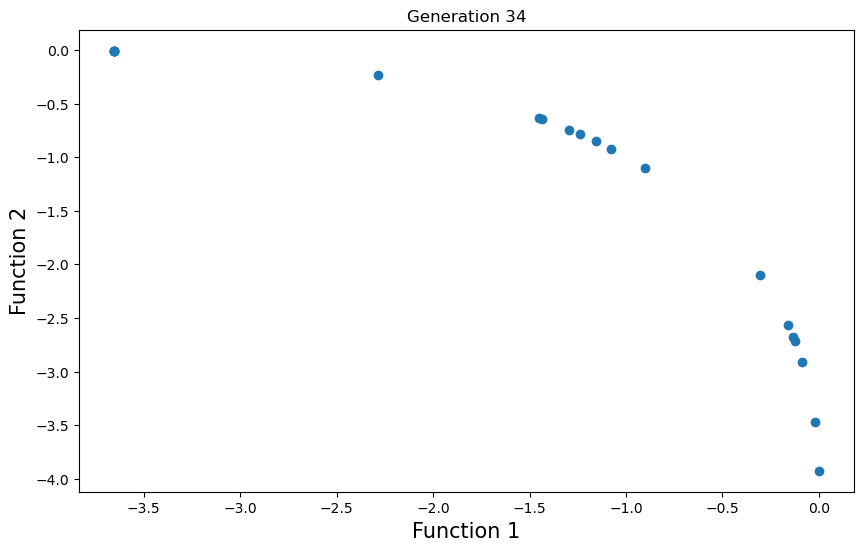

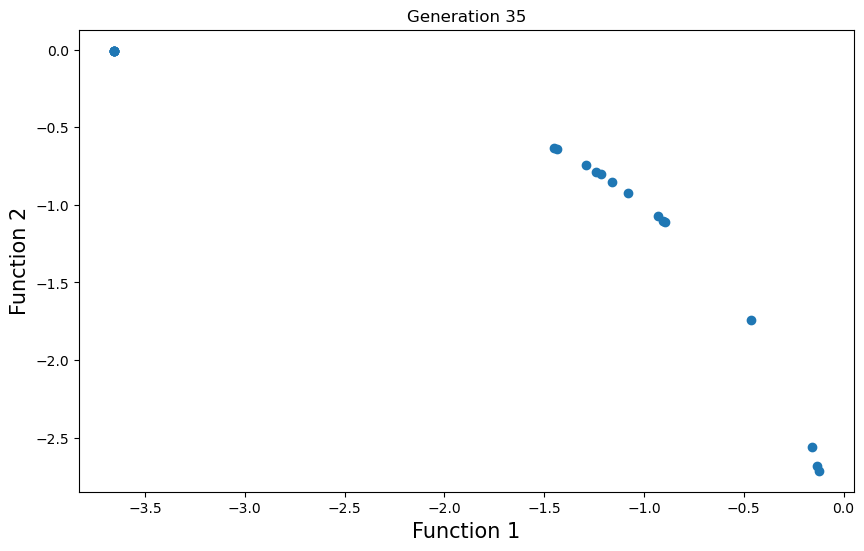

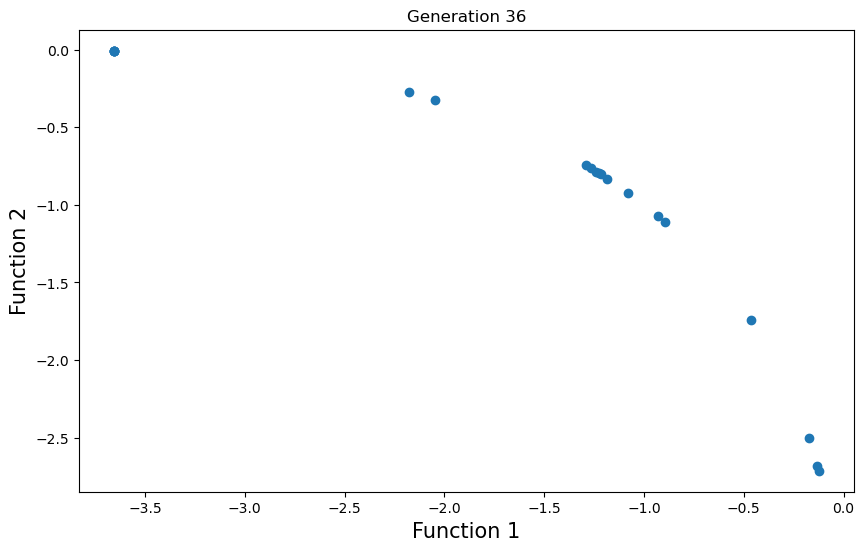

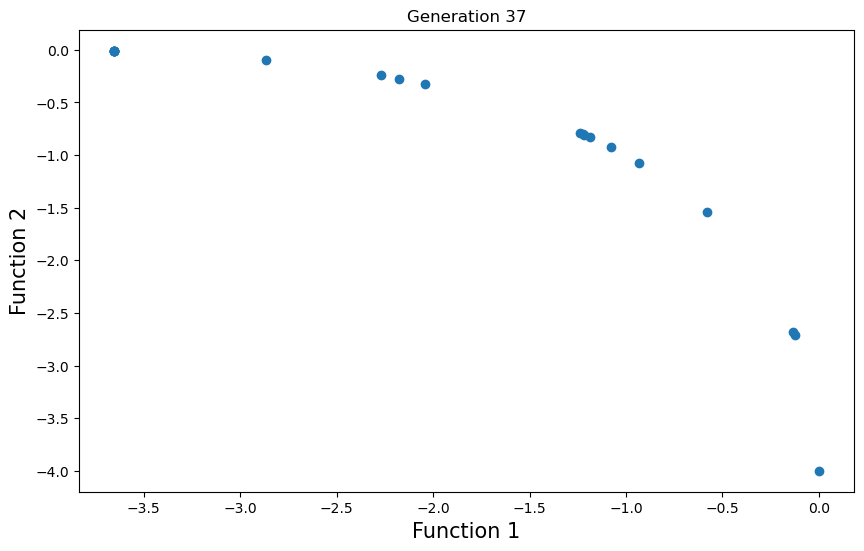

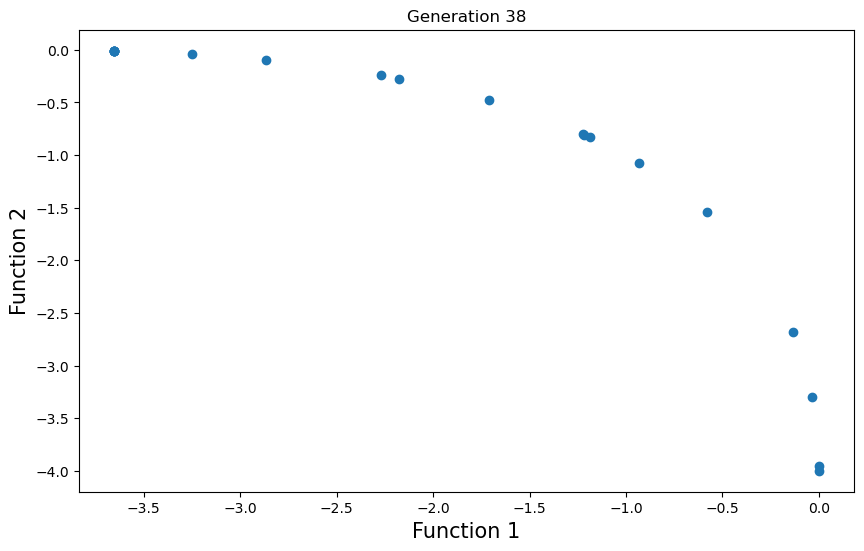

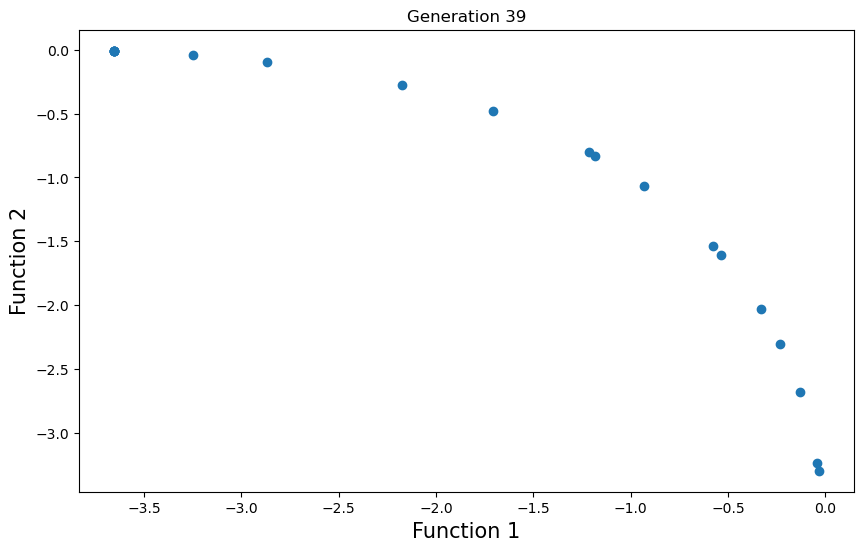

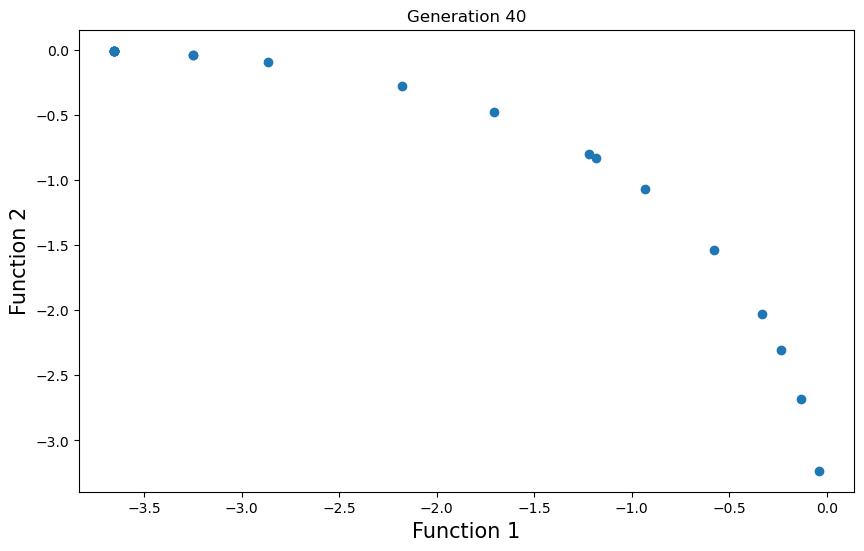

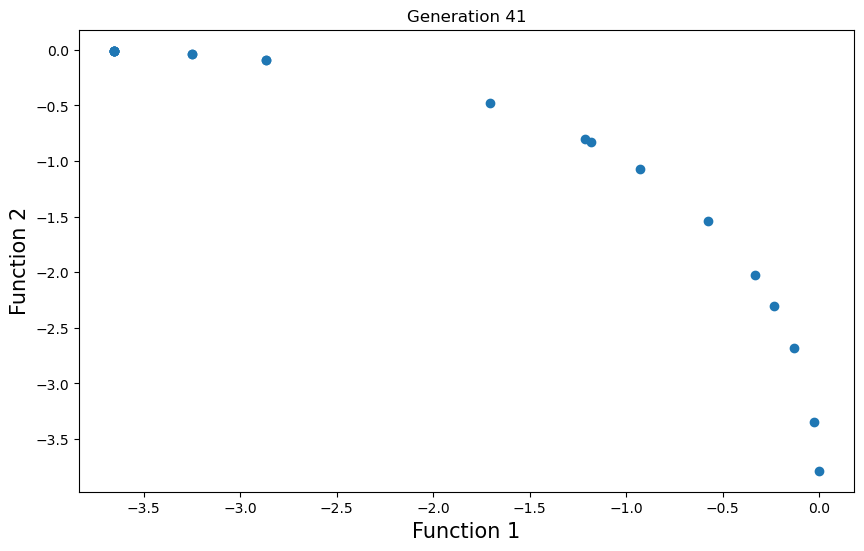

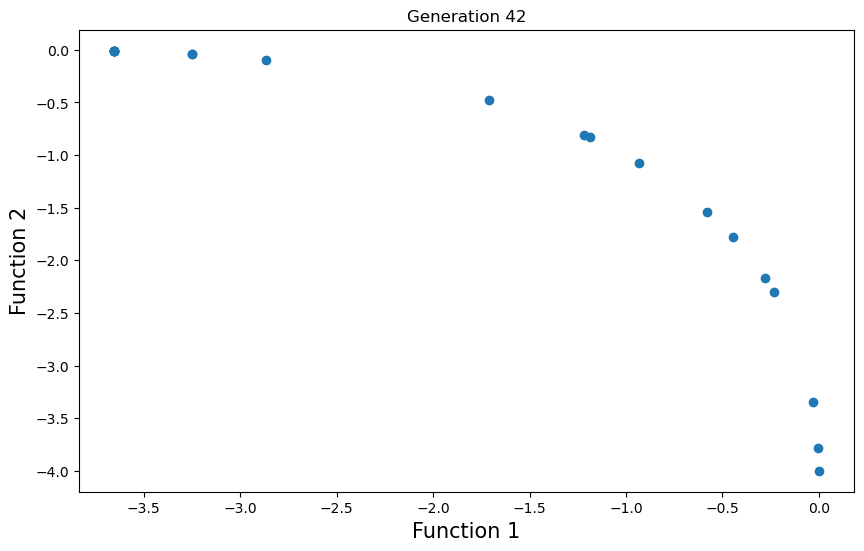

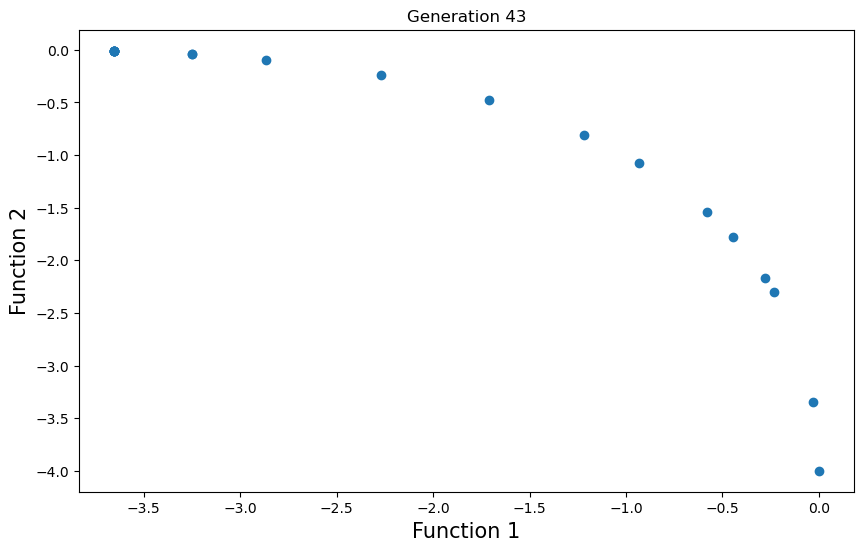

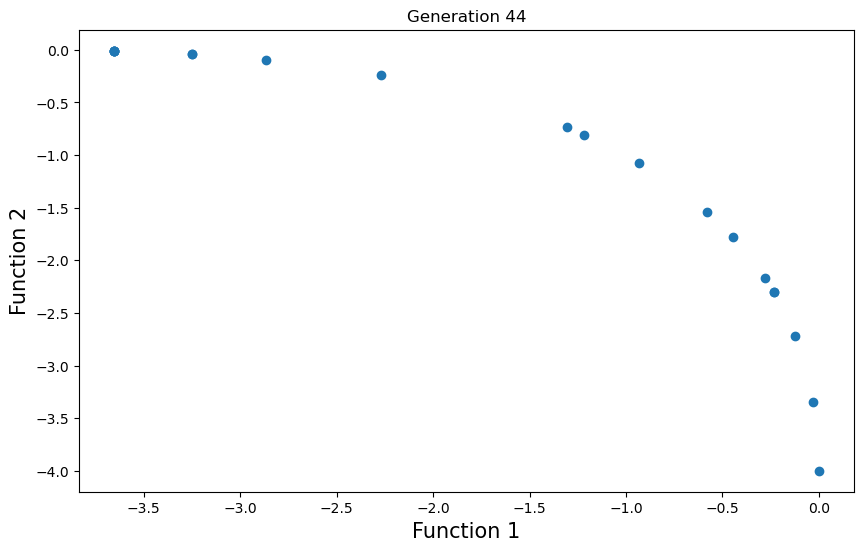

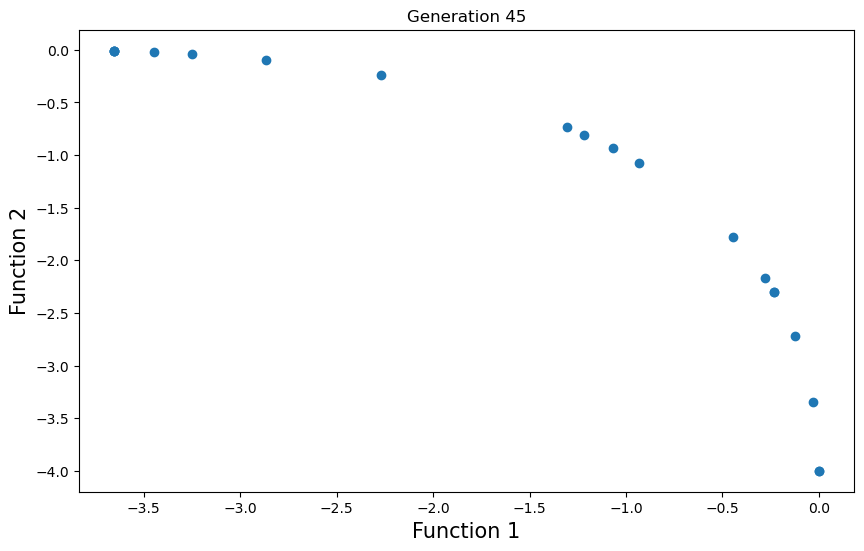

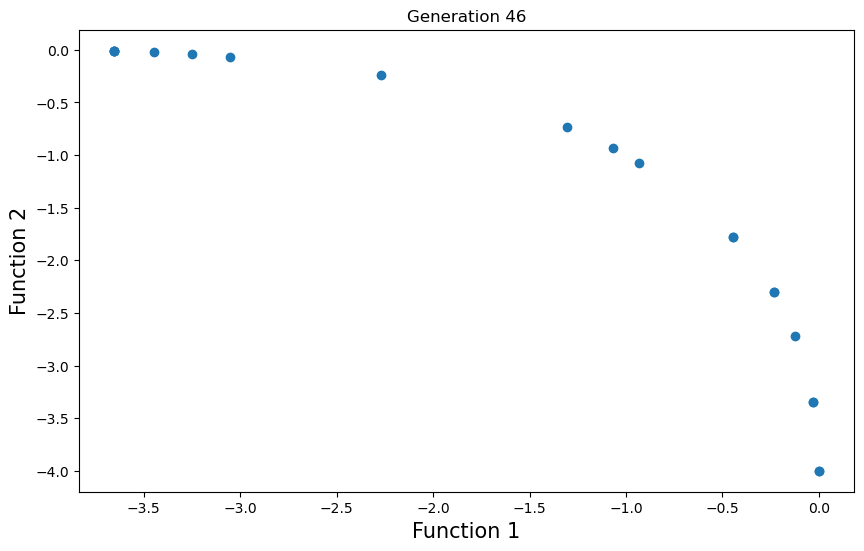

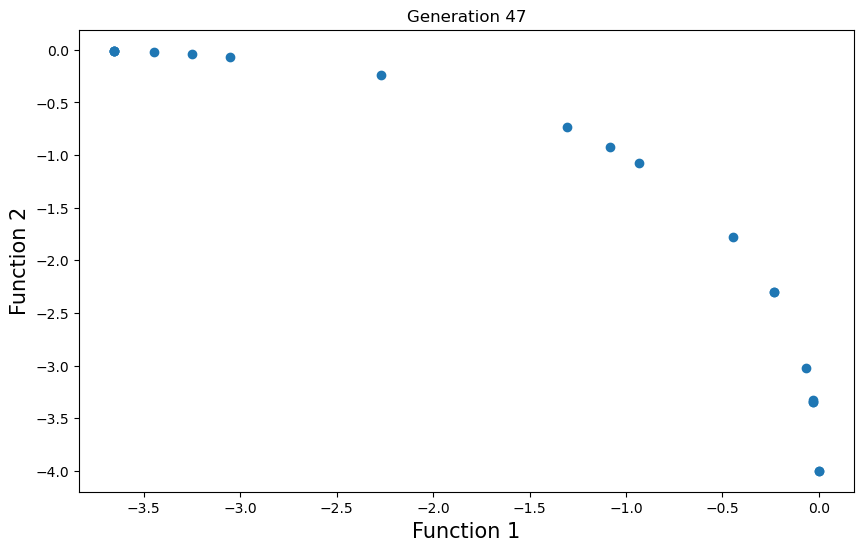

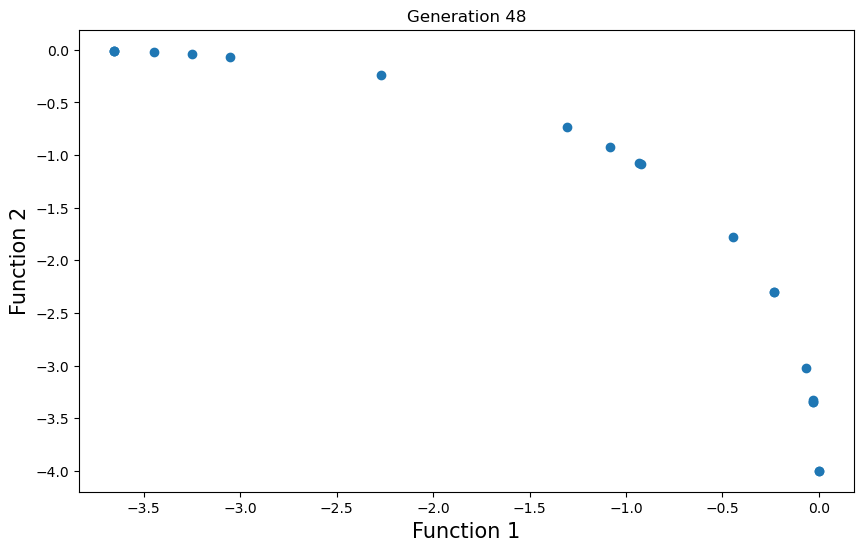

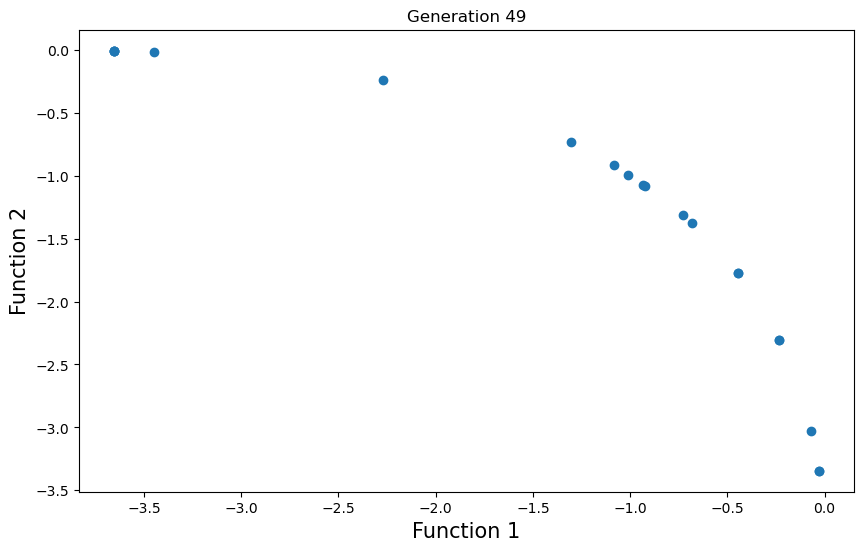

In [9]:
# Let's plot the final front
function1_values = [function1(solution[i]) for i in range(pop_size)]
function2_values = [function2(solution[i]) for i in range(pop_size)]

# Visualize the final front
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.title('Final Front')
plt.scatter(function1_values, function2_values)
plt.show()

# Visualize the progress over generations
for gen, (f1_vals, f2_vals) in enumerate(progress):
    plt.figure(figsize=(10, 6))
    plt.scatter(f1_vals, f2_vals)
    plt.xlabel('Function 1', fontsize=15)
    plt.ylabel('Function 2', fontsize=15)
    plt.title(f'Generation {gen}')
    plt.show()
